# Face recognition
Task is to recognize  faces

In [1]:
import tensorflow
tensorflow.__version__

'2.8.0'

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt

In [3]:
### Function to load images
### - Define a function to load the images from the extracted folder and map each image with person id 

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)



In [4]:
# metadata = load_metadata('images')
metadata = load_metadata('images/')

In [5]:
metadata

array([images/0\image_0001.jpg, images/0\image_0002.jpg,
       images/0\image_0003.jpg, images/0\image_0004.jpg,
       images/0\image_0005.jpg, images/0\image_0006.jpg,
       images/0\image_0007.jpg, images/0\image_0008.jpg,
       images/0\image_0009.jpg, images/0\image_0010.jpg,
       images/0\image_0011.jpg, images/0\image_0012.jpg,
       images/0\image_0013.jpg, images/0\image_0014.jpg,
       images/0\image_0015.jpg, images/0\image_0016.jpg,
       images/0\image_0017.jpg, images/0\image_0018.jpg,
       images/0\image_0019.jpg, images/0\image_0020.jpg,
       images/0\image_0021.jpg, images/1\image_0429.jpg,
       images/1\image_0430.jpg, images/1\image_0431.jpg,
       images/1\image_0432.jpg, images/1\image_0433.jpg,
       images/1\image_0434.jpg, images/1\image_0435.jpg,
       images/1\image_0436.jpg, images/1\image_0437.jpg,
       images/1\image_0438.jpg, images/1\image_0439.jpg,
       images/1\image_0440.jpg, images/1\image_0441.jpg,
       images/1\image_0442.jpg,

## Function to load image

In [6]:
import cv2
def load_image(path):
    img=cv2.imread(path,1)
    # 1-color image , 0-greyscale image
    # opencv loads images with color channels in BGR mode. So we reverse them
    return img[...,::-1]
    # Reversing from bgr to rgb

### Loading a sample image

In [7]:
# Loading a sample image
load_image(metadata[0].image_path())

array([[[ 82,  75,  65],
        [ 67,  63,  52],
        [ 77,  74,  65],
        ...,
        [150, 146, 145],
        [152, 148, 145],
        [170, 166, 163]],

       [[ 82,  75,  67],
        [ 72,  68,  59],
        [ 89,  86,  77],
        ...,
        [150, 146, 143],
        [151, 147, 144],
        [169, 165, 162]],

       [[ 84,  79,  73],
        [ 80,  75,  69],
        [ 83,  80,  73],
        ...,
        [149, 146, 141],
        [150, 147, 142],
        [168, 165, 160]],

       ...,

       [[130, 136, 122],
        [130, 136, 122],
        [137, 143, 129],
        ...,
        [ 48,  66,  90],
        [ 38,  56,  80],
        [ 32,  50,  74]],

       [[136, 139, 128],
        [132, 135, 124],
        [133, 137, 123],
        ...,
        [ 54,  70,  95],
        [ 49,  65,  90],
        [ 20,  36,  61]],

       [[135, 138, 127],
        [134, 137, 126],
        [132, 136, 122],
        ...,
        [ 53,  67,  93],
        [ 54,  68,  94],
        [ 33,  47,  73]]

In [8]:
plt.show(load_image)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D , Convolution2D , MaxPooling2D, Flatten, Activation, Dropout

In [10]:
def vgg_face():
    model=Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2),strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2),strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2),strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2),strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2),strides=(2,2)))
    
    model.add(Convolution2D(4096,(7,7),activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096,(1,1),activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622,(1,1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

vgg_face()

In [11]:
from tensorflow.keras.models import Model
model=vgg_face()
# model.load_weights('weights.h5')

In [12]:
from tensorflow.keras.models import Model
vgg_face_descriptor=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

# Generating embeddings for each image in the dataset

 - ###  Given below is an example to load the first image in the metadata and get its embeding vector from the model

In [13]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path=metadata[0].image_path()
img=load_image(img_path)
# Normalising pixel values from [0-255] to [0-1]: scale RGB values to intervl [0,1]
img=(img/255).astype(np.float32)
img=cv2.resize(img,dsize=(224,224))
print(img.shape)
# Obtain embedding vector for an image

# Get the embedding vector for the above image using vgg_face descriptor model and print
embeding_vector=vgg_face_descriptor.predict(np.expand_dims(img,axis=0))[0]
print(embeding_vector.shape)

(224, 224, 3)
(2622,)


In [14]:
embedding=np.zeros((metadata.shape[0],2622))

for i,m in enumerate(metadata):
    try:
        img=load_image(m.image_path())
        img=cv2.resize(img,dsize=(224,224))
        img-(img/255.).astype(np.float32)
        embeddings[i]=vgg_face_descriptor.predict(np.expand_dims(img,axis=0))[0]
    except Exception as e:
        print(str(e))
        print(i,m)

name 'embeddings' is not defined
0 images/0\image_0001.jpg
name 'embeddings' is not defined
1 images/0\image_0002.jpg
name 'embeddings' is not defined
2 images/0\image_0003.jpg
name 'embeddings' is not defined
3 images/0\image_0004.jpg
name 'embeddings' is not defined
4 images/0\image_0005.jpg
name 'embeddings' is not defined
5 images/0\image_0006.jpg
name 'embeddings' is not defined
6 images/0\image_0007.jpg
name 'embeddings' is not defined
7 images/0\image_0008.jpg
name 'embeddings' is not defined
8 images/0\image_0009.jpg
name 'embeddings' is not defined
9 images/0\image_0010.jpg
name 'embeddings' is not defined
10 images/0\image_0011.jpg
name 'embeddings' is not defined
11 images/0\image_0012.jpg
name 'embeddings' is not defined
12 images/0\image_0013.jpg
name 'embeddings' is not defined
13 images/0\image_0014.jpg
name 'embeddings' is not defined
14 images/0\image_0015.jpg
name 'embeddings' is not defined
15 images/0\image_0016.jpg
name 'embeddings' is not defined
16 images/0\image

name 'embeddings' is not defined
137 images/7\image_0342.jpg
name 'embeddings' is not defined
138 images/7\image_0343.jpg
name 'embeddings' is not defined
139 images/7\image_0344.jpg
name 'embeddings' is not defined
140 images/7\image_0345.jpg
name 'embeddings' is not defined
141 images/7\image_0346.jpg
name 'embeddings' is not defined
142 images/7\image_0347.jpg
name 'embeddings' is not defined
143 images/7\image_0348.jpg
name 'embeddings' is not defined
144 images/7\image_0349.jpg
name 'embeddings' is not defined
145 images/7\image_0350.jpg
name 'embeddings' is not defined
146 images/7\image_0351.jpg
name 'embeddings' is not defined
147 images/7\image_0352.jpg
name 'embeddings' is not defined
148 images/7\image_0353.jpg
name 'embeddings' is not defined
149 images/7\image_0354.jpg
name 'embeddings' is not defined
150 images/7\image_0355.jpg
name 'embeddings' is not defined
151 images/7\image_0356.jpg
name 'embeddings' is not defined
152 images/8\image_0308.jpg
name 'embeddings' is not

### Function to calculate distance between giiven 2 pairs of images

- Consider distance metric as 'Squared L2'

- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [15]:

def distance (emb1,emb2):
    return np.sum(np.square(emb1-emb2))

### Plot images and get distance between the pairs given below

- 2,3 and 2,180
- 30,31 and 30,100
- 70,72 and 70,115

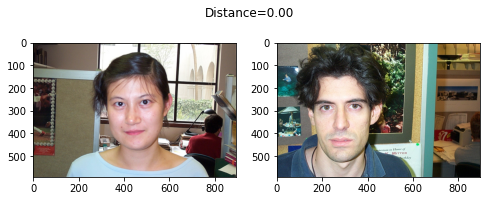

In [16]:
def show_pair(idx1,idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance={distance(embedding[idx1],embedding[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()))
show_pair(30,100)

## Create train and test sets

- Create
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [17]:
train_idx = np.arange (metadata.shape[0]) % 9 !=0
test_idx = np.arange (metadata.shape[0]) % 9 ==0
# one half as train examples of 10 identities
X_train = embedding[train_idx]
# another half as test examples of 10 identites
X_test =  embedding[test_idx]
targets= np.array([m.name for m in metadata] )
y_train = targets [train_idx]
y_test = targets [test_idx]

## Encode the labels 

-  Encode the targest
- Use Labelencoder

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

In [19]:
### Standardize features
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

## Reducing dimensions using PCA

- Reduce feature dimensions using principal component analysis

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca=PCA(n_components=23,svd_solver='randomized',whiten=True)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

C:\Users\sanke\Anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()
C:\Users\sanke\Anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


## Build a Classifier

- Use SVM Classifier to predcit the person in the given image
- Fit the classifier and print the score

In [22]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',class_weight=None, C=1000,gamma='auto')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.08695652173913043

In [23]:
clf.score(X_train,y_train)


0.2696629213483146

### Test results
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

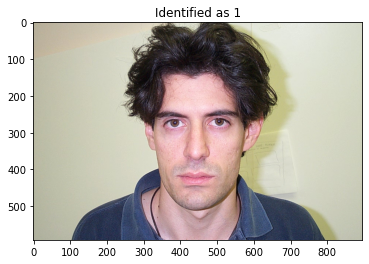

In [24]:
example_idx=10
example_image=load_image(metadata[test_idx][example_idx].image_path())
example_prediction = clf.predict([X_test[example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');